In [46]:
import numpy as np
import matplotlib.pyplot as plt
import time 

## Problem 1 

Starting with the fundamental expression of the linear least squares: 

$ A^TN^{-1}A m = A^T N^{-1}d $ 

Using the QR factorization, when A = QR: 

$ (QR)^TN^{-1}(QR) m = (QR)^T N^{-1}d $

$ R^TQ^TN^{-1}QRm = R^TQ^TN^{-1}d $

So the fit parameters are as follows: 

$ m = (Q^TN^{-1}QR)^{-1}Q^TN^{-1}d $

We can test this decomposition versus a classical least squares fit, where if N is constant our parameters using QR factorization are: 

$ m = R^{-1}Q^Td $

error RMS for classical fit 0.20480956961127128
error RMS for QR decomposition fit 2.2450905750253025e-05


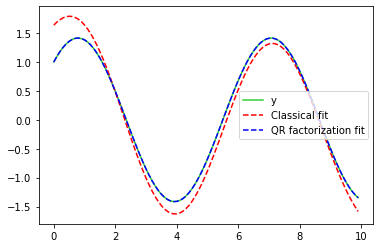

In [108]:
x = np.arange(0,10,0.1)
y = np.cos(x)+ np.sin(x)

order=12
A=np.polynomial.polynomial.polyvander(x,order)


# first do classical fit 
lhs=A.T@A
rhs=A.T@y
m=np.linalg.inv(lhs)@rhs
poly_fit = A@m
print('error RMS for classical fit',np.sqrt(np.mean((poly_fit-y)**2)))


# Second do a QR decomposition
q,r = np.linalg.qr(A)
rhs = np.linalg.inv(r)@q.T
m = rhs@y
qr_fit = A@m
print('error RMS for QR decomposition fit',np.sqrt(np.mean((qr_fit-y)**2)))

plt.plot(x,y,color='limegreen',label='y')
plt.plot(x,poly_fit,'--',color='r',label='Classical fit')
plt.plot(x,qr_fit,'--',color='b', label='QR factorization fit')
plt.legend() 
plt.show()

At the higher order polynomial fits, the QR decomposition does a much better job at fitting the original function, as we can see by the RMS. 

## Problem 2 

### Part (a) 

Fit a chebyshev to an exponential and show that at a high order, the fit remains good.

rms error on fit order 0 is 0.6658158631713775
rms error on fit order 1 is 0.1657818776009756
rms error on fit order 2 is 0.02767405206657734
rms error on fit order 3 is 0.0034733745007325257


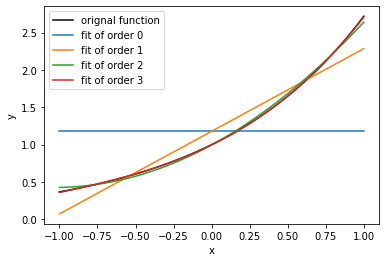

In [377]:
# make a chebyshev using the recurrance relation

def cheb(nx,order):
    
    x=np.linspace(-1,1,nx)
    T=np.zeros([nx,order+1])
    
    # set T0 =1 and T1 = x 
    T[:,0]=1.0
    if order>0:
        T[:,1]=x
        
    # For all following terms use recurrance relation
    if order>1:
        for i in range(1,order):
            T[:,i+1]=2*x*T[:,i]-T[:,i-1]
    return T,x

n=100
x=np.linspace(-1,1,n)
y = np.exp(x)
plt.plot(x,y,'k',label='orignal function')

# show for the first couple of orders 
for i in range(4):
    order=i
    A,x = cheb(n,order)
    y = np.exp(x)

    #Do a classical least-squares fit
    lhs=A.T@A
    rhs=A.T@y
    m=np.linalg.inv(lhs)@rhs
    fit = A@m
    
    print(f'rms error on fit order {i} is',np.sqrt(np.mean((fit-y)**2)))
    plt.plot(x,fit,label=f'fit of order {i}')
    
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()


(16,)
rms error on fit order 15 is: 5.30240470919965e-16


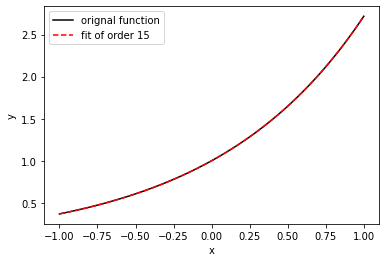

In [378]:
# Show that even at high orders it is a good fit 

n=100
order= 15
A,x = cheb(n,order)
y = np.exp(x)

#Do a classical least-squares fit
lhs=A.T@A
rhs=A.T@y
m=np.linalg.inv(lhs)@rhs
fit = A@m

print(m.shape)

print(f'rms error on fit order {order} is:',np.sqrt(np.mean((fit-y)**2)))
plt.plot(x,y,'k',label='orignal function')
plt.plot(x,fit,label=f'fit of order {order}',color='r', linestyle='--')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

### Part (b)

rms error on fit order 6 is: 2.1015243428707153e-06
max error on fit order 6 is: 6.538203271233556e-06


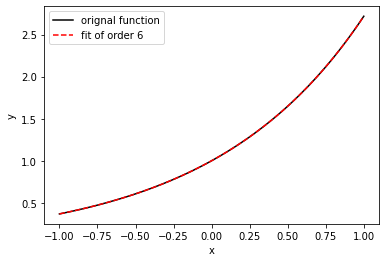

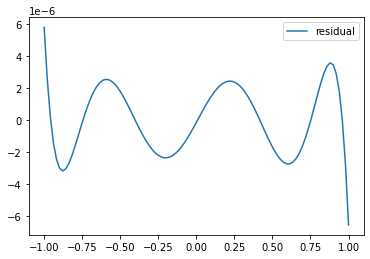

In [380]:
# Fit a 6 order chebyshev

n=100
order= 6
A,x = cheb(n,order)
y = np.exp(x)

#Do a classical least-squares fit
lhs=A.T@A
rhs=A.T@y
m=np.linalg.inv(lhs)@rhs
fit = A@m

print(f'rms error on fit order {order} is:',np.sqrt(np.mean((fit-y)**2)))
print(f'max error on fit order {order} is:',np.max(np.abs(fit-y)))
      
plt.plot(x,y,'k',label='orignal function')
plt.plot(x,fit,label=f'fit of order {order}',color='r', linestyle='--')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

plt.plot(x,fit-y,label='residual')
plt.legend()
plt.show()


rms error on truncated fit order 30 is: 2.2765634194868067e-06
max error on truncated fit order 30 is: 3.4092623590886717e-06

fractional difference between fit and truncated fit:
RMS 92.31125849085507


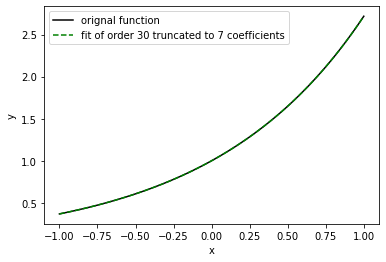

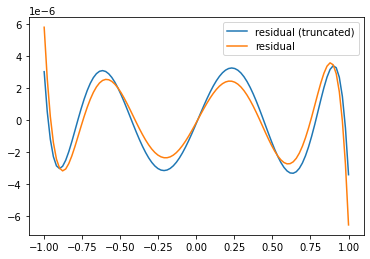

In [384]:
# Fit much hider order chebyshev and then truncate to 7 terms
# What is RMS error of truncated to 7 
# What is max error truncated to 7

n=100
order= 30

# truncate at 7 coefficients 
ncoeff =7 
A,x = cheb(n,order)
y = np.exp(x)

#Do a classical least-squares fit (truncated)
lhs=A.T@A
rhs=A.T@y
m=np.linalg.inv(lhs)@rhs
fit_trunc = A[:,:ncoeff]@m[:ncoeff]


print(f'rms error on truncated fit order {order} is:',np.sqrt(np.mean((fit_trunc-y)**2)))
print(f'max error on truncated fit order {order} is:',np.max(np.abs(fit_trunc-y)))
      
plt.plot(x,y,'k',label='orignal function')
plt.plot(x,fit_trunc,label=f'fit of order {order} truncated to {ncoeff} coefficients',color='g', linestyle='--')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

plt.plot(x,fit_trunc-y,label='residual (truncated)')
plt.plot(x,fit-y,label='residual')
plt.legend()
plt.show()


Can see above that the RMS of the truncated fit, 2.277e-6 is about 10% larger than the RMS of the order 6 fit without truncation which was 2.102e-06.

The max error on the truncated fit however, 3.41e-6, is about half the max error on the order 6 fit which was 6.54e-6.

## Problem 3

Instead of using Choleskey decomposition, we will use the eigenvalues and eigenvectors of the noise matrix. In Choleskey, we use the following decomposition: 

$N = LL^T$

To obtain the lower triangle matrix L that can allow us to convert into and out of correlated space from uncorrelated: 

$\tilde{A} = L^{-1}A$

We are interested in calculating L because it will allow us to generate correlated simulated data:

dat_sim = Lg

Where g is unit variance gaussian random noise. 

However, we also know that: 

$\tilde{A} = \Lambda^{-1/2} V^T A$

Where $\Lambda$ is the matrix of eigenvectors and V is the eigenvalues. We can see that:

$L = V^T\Lambda^{1/2}$

And can therefore use the eigenvalues/eigenvector decomposition instead of Choleskey. This is demonstrated below where my function corr_noise takes any noise matrix and computes the L matrix which allows us to generate random correlated data. 



fractional correlation error is  5.460093821552255 %


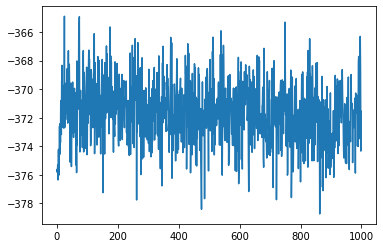

In [394]:
n=1000

# a test noise matrix
N = np.ones((n,n))
for i in range(n):
    N[i,i] = 2
    
def corr_noise(N):
    
    # Decompose noise matrix into eigen values and eigenvectors
    v,lam = np.linalg.eigh(N)

    # L = v^T lam^(1/2)
    sqrt = abs(lam)**(1/2)
    L = v.T*sqrt

    # Move to correlated space to generate data
    dat=L@np.random.randn(n)

    # Do many realizations
    nsim=10000
    tmp=L@np.random.randn(n,nsim) 
    
    corr=tmp@tmp.T/nsim #average of the simulations
    
    print('fractional correlation error is ',np.std(corr-N)/np.mean(N),'%')
    
    return dat

dat = corr_noise(N)

plt.plot(dat)
plt.show()

Because of the low fractional correlation error, we see that $<dd^T>$ converges to the noise matrix.

## Problem 4

In [391]:
# Code up the noise matrix

def N_mat(n,a,sig):
    N = np.eye(n) 
    for i in range(N.shape[0]):
        for j in range(N.shape[1]):
            if i != j:
                N[i,j] = a*np.exp(-0.5*((i-j)/sig)**2)  
    return N

### Part (a)


For parameters a=0.1 and sig=5
Get an error of 0.216


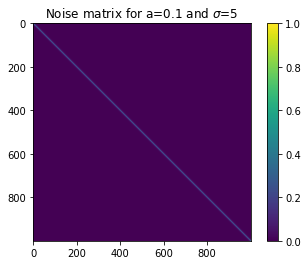


For parameters a=0.1 and sig=50
Get an error of 0.370


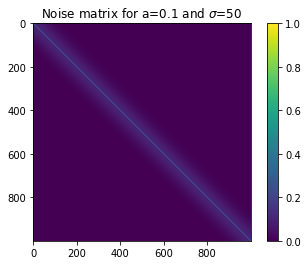


For parameters a=0.1 and sig=500
Get an error of 0.195


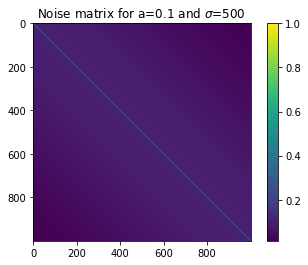


For parameters a=0.5 and sig=5
Get an error of 0.375


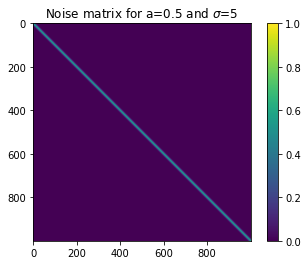


For parameters a=0.5 and sig=50
Get an error of 0.731


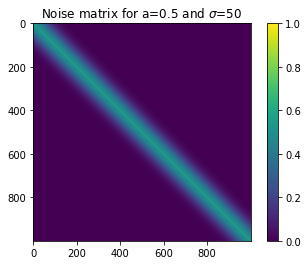


For parameters a=0.5 and sig=500
Get an error of 0.183


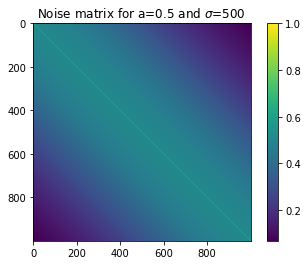


For parameters a=0.9 and sig=5
Get an error of 0.479


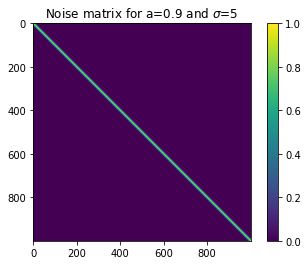


For parameters a=0.9 and sig=50
Get an error of 0.954


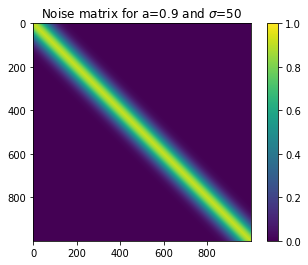


For parameters a=0.9 and sig=500
Get an error of 0.109


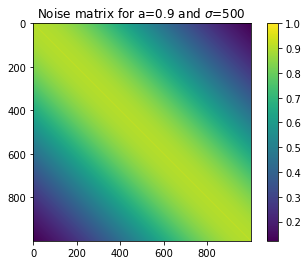

In [398]:
n = 1000
x = np.arange(0,n)

# define parameters
sig_src = 50
a = np.array([0.1,0.5, 0.9])
sig = np.array([5,50,500])

N_all =[]
pair = []
for i in a: 
    for j in sig: 
        N = N_mat(n,i,j)
        N_all.append(N)
        pair.append((i,j))
        
        # guassian 
        A = np.exp(-0.5*(x/sig_src)**2) 
        
        # do a pseudo inverse due to challenge in iverting extremely small numbers
        Ninv = np.linalg.pinv(N)

        lhs = np.dot(A.T,Ninv@A) 
        err = np.sqrt(1/lhs)
        
        print()
        print(f'For parameters a={i} and sig={j}')
        print('Get an error of {:.3f}'.format(err))
        
        plt.imshow(N)
        plt.title(f'Noise matrix for a={i} and $\sigma$={j}')
        plt.colorbar() 
        plt.show()
        

### Part (b)

The set of parameters that has the worst error is a=0.9 and $\sigma$ = 50. The driving reason for this is that we are using the same $\sigma$ as our source, a guassian also with $\sigma$ equal to 50. We can see that for a given value of a, how close our correlation length is to the $\sigma$ in the source we are using will drive the errors up and down, with the maximum error occuring when the $\sigma$s are the same. When $\sigma$ is 5 in the noise matrix, the errors are lower than when it is 50, but not as low as when it is 500 because the further the $\sigma$ is from the source $\sigma$, the less correlated the data will be to the noise. 

There is another trend with the a values. However this trend seems to depend on how similar the $\sigma$s are, I think because the $\sigma$ is in the exponent and therefore has more influence. When the $\sigma$ in the noise is similar to the source $\sigma$, the error increases with increasing a. However, when $\sigma$ gets large enough, it dominates and the trend in a reverses, which is why we see the best and worst errors having a=0.9. 

In short, a and $\sigma$ are intertwined- but $\sigma$ seems to have more influence over the error than a does. The best errors are going to occur when the noise $\sigma$ is much greater (or less if applicable) than the source $\sigma$ because there will be less correlation in the exponent with the data. 

a= 0.1 sig= 5


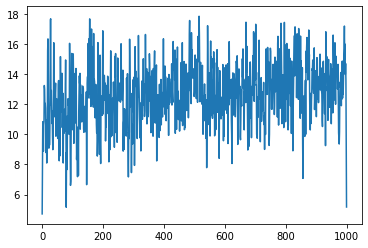

a= 0.1 sig= 50


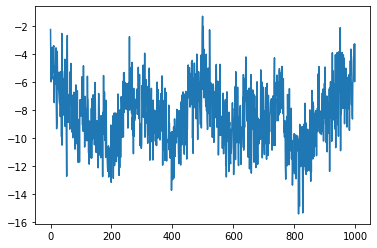

a= 0.1 sig= 500


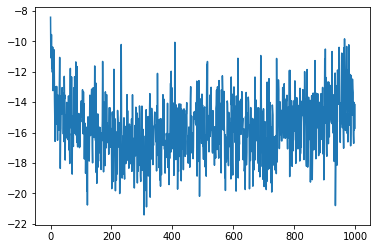

a= 0.5 sig= 5


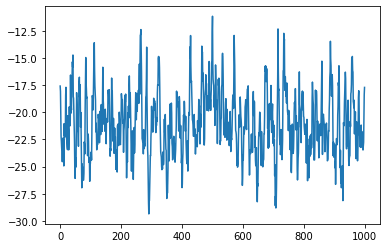

a= 0.5 sig= 50


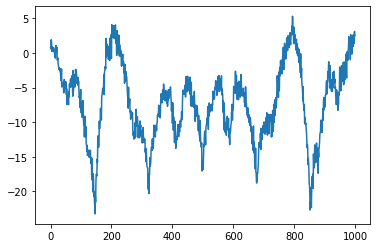

a= 0.5 sig= 500


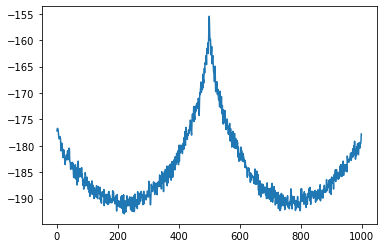

a= 0.9 sig= 5


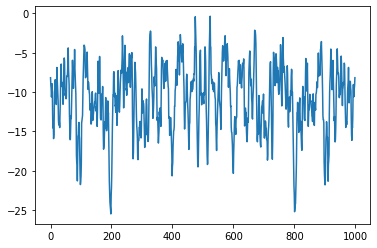

a= 0.9 sig= 50


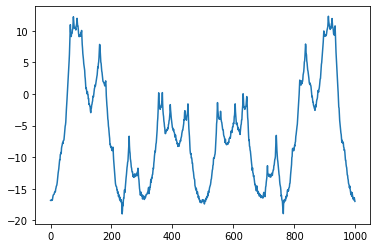

a= 0.9 sig= 500


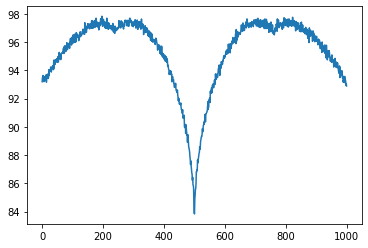

In [393]:
# Have a quick look at the noise realizations using the generating function from question 3

for i in range(len(N_all)):
    dat = corr_noise(N_all[i])
    
    print('a=',pair[i][0],'sig=',pair[i][1])
    plt.plot(dat)
    plt.show()